In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine,runNNs
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
ica = FastICA(n_components=3,
         random_state=0)
icaComponents =ica.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
X_train = pd.DataFrame(data = icaComponents,index=X_train.index
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])
icaComponents = ica.transform(X_test)
X_test = pd.DataFrame(data = icaComponents,index=X_test.index
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])


y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = len(encoder.classes_)
X_test.head()

,ICA component 1,ICA component 2,ICA component 3
BeerID,,,
53355,0.002487,0.003980,-0.000428
65753,0.009427,0.004311,-0.000493
59953,0.002307,-0.002554,-0.000003
19190,0.011436,0.004229,0.000090
41651,0.002740,0.004188,0.000057


In [3]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_kmeans
y_kmeans = kmeans.predict(X_test)
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_kmeans

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


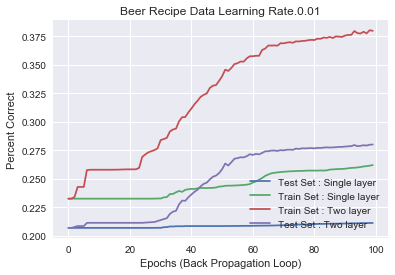

In [4]:
learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Beer Recipe Data Learning Rate.",100,i)

In [8]:
X_train, X_test, y_train, y_test= loadWine()

ica = FastICA(n_components=3,
         random_state=0)
icaComponents =ica.fit_transform(X_train)
X_train = pd.DataFrame(data = icaComponents,index=X_train.index
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])
icaComponents = ica.transform(X_test)
X_test = pd.DataFrame(data = icaComponents,index=X_test.index
             , columns = ['ICA component 1', 'ICA component 2','ICA component 3'])
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_kmeans
y_kmeans = kmeans.predict(X_test)
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_kmeans

num_features = X_train.shape[1]
num_classes = 10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


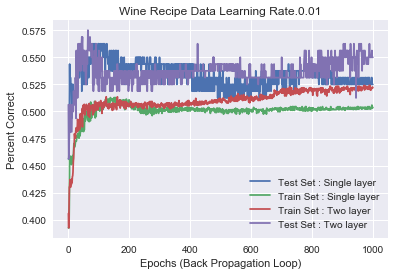

In [9]:
learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Wine Recipe Data Learning Rate.",1000,i)